### Starting out with pandas ###

In this code snippet we read the csv's to store each year's information in a `pandas` DataFrame in order to extract what we want. The name of the variable comes from the student, which in portuguese is written as *"aluno"* or *"discente"*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#!pip install pandas

dis09 = pd.read_csv('../res/discentes-2009.csv', sep=';', encoding='utf8')
dis10 = pd.read_csv('../res/discentes-2010.csv', sep=';', encoding='utf8')
dis11 = pd.read_csv('../res/discentes-2011.csv', sep=';', encoding='utf8')
dis12 = pd.read_csv('../res/discentes-2012.csv', sep=';', encoding='utf8')
dis13 = pd.read_csv('../res/discentes-2013.csv', sep=';', encoding='utf8')
dis14 = pd.read_csv('../res/discentes-2014.csv', sep=';', encoding='utf8')
dis15 = pd.read_csv('../res/discentes-2015.csv', sep=';', encoding='utf8')
dis16 = pd.read_csv('../res/discentes-2016.csv', sep=';', encoding='utf8')
dis17 = pd.read_csv('../res/discentes-2017.csv', sep=';', encoding='utf8')
dis18 = pd.read_csv('../res/discentes-2018.csv', sep=';', encoding='utf8')

We only want to work with graduation students, so that's what this code is doing. Also, there are some columns that do not have much use for use, so we store their id's in a variable (`drop_cols`) and drop them from the DataFrame.

In [3]:
drop_cols = ['sigla_nivel_ensino', 'id_unidade_gestora', 'nome_unidade_gestora','forma_ingresso']

dis09 = dis09[dis09.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis10 = dis10[dis10.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis11 = dis11[dis11.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis12 = dis12[dis12.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis13 = dis13[dis13.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis14 = dis14[dis14.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis15 = dis15[dis15.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis16 = dis16[dis16.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis17 = dis17[dis17.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis18 = dis18[dis18.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)

In [4]:
dis09.dropna(inplace=True)
dis10.dropna(inplace=True)
dis11.dropna(inplace=True)
dis12.dropna(inplace=True)
dis13.dropna(inplace=True)
dis14.dropna(inplace=True)
dis15.dropna(inplace=True)
dis16.dropna(inplace=True)
dis17.dropna(inplace=True)
dis18.dropna(inplace=True)

In [5]:
columns=["matricula","status","nome_curso","ano_ingresso"]

In [6]:
#Para qualquer curso

#2009
Filtro = dis09
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado09 = Filtro[Filtro.status=="CANCELADO"]

#2010
Filtro = dis10
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado10 = Filtro[Filtro.status=="CANCELADO"]

#2011
Filtro = dis11
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado11 = Filtro[Filtro.status=="CANCELADO"]

#2012
Filtro = dis12
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado12 = Filtro[Filtro.status=="CANCELADO"]

#2013
Filtro = dis13
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado13 = Filtro[Filtro.status=="CANCELADO"]

#2014
Filtro = dis14
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado14 = Filtro[Filtro.status=="CANCELADO"]

#2015
Filtro = dis15
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado15 = Filtro[Filtro.status=="CANCELADO"]

#2016
Filtro = dis16
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado16 = Filtro[Filtro.status=="CANCELADO"]

#2017
Filtro = dis17
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado17 = Filtro[Filtro.status=="CANCELADO"]

#2018
Filtro = dis18
Filtro = Filtro[~Filtro.nome_curso.isnull()]  
Cancelado18 = Filtro[Filtro.status=="CANCELADO"]


In [7]:
CanceladoTotal = pd.concat([Cancelado09, Cancelado10,Cancelado11,Cancelado12,
                   Cancelado13,Cancelado14,Cancelado15,Cancelado16,Cancelado17,Cancelado18], ignore_index=True)

In [8]:
CanceladoTotal = CanceladoTotal[~CanceladoTotal.matricula.duplicated()]
CanceladoTotal

,matricula,nome_discente,ano_ingresso,periodo_ingresso,tipo_discente,status,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade
0,2.009022e+09,Abdias Beserra Pereira Júnior,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,111635057.0,HISTÓRIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1,2.009048e+09,ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,2000121.0,ECOLOGIA,PRESENCIAL,440.0,CENTRO DE BIOCIÊNCIAS
2,2.009031e+09,ABIMAEL SILVA CHIBÉRIO,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA
3,2.009066e+09,ABNER FLAVIO TEIXEIRA SOARES,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,2000054.0,MATEMÁTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
4,2.009022e+09,ABSON ISAQUE SANTOS DE ALBUQUERQUE,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,111635057.0,HISTÓRIA,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
5,2.009065e+09,ACARILTON EDUARDO DA SILVA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,2000009.0,CIÊNCIAS BIOLÓGICAS,PRESENCIAL,440.0,CENTRO DE BIOCIÊNCIAS
6,2.009043e+09,ACILÉGNA CRISTINA DUARTE GUEDES ALCOFORADO,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,2000054.0,MATEMÁTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
7,2.009062e+09,ADAILDA APARECIDA DE OLIVEIRA DANTAS,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,2000053.0,LETRAS,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
8,2.009060e+09,ADAILDO FERREIRA DE MACEDO SILVA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,2000004.0,ADMINISTRAÇÃO,PRESENCIAL,1482.0,CENTRO DE ENSINO SUPERIOR DO SERIDÓ
9,2.009033e+09,ADALBERTO MAIA DA SILVA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,6633741.0,CIÊNCIAS ATUARIAIS,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA


In [9]:
nome_curso = CanceladoTotal.nome_curso.unique() #Lista dos Cursos
ano_ingresso = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [10]:
#columnsDataFrame = ['ano']
#columnsDataFrame.append(nome_curso)

def storeCounting(nome,ano,cancel):
    c = CanceladoTotal[CanceladoTotal.nome_curso == nome]
    d = c[c.ano_ingresso == ano]
    return cancel.append({'curso': nome,'ano': ano, 'total_cancelados': d.ano_ingresso.count()},ignore_index=True)
 
cancel = pd.DataFrame(columns=["curso","ano","total_cancelados"])    
for i in nome_curso:
    for j in ano_ingresso:
        cancel = storeCounting(i,j,cancel)    

In [11]:
#def armazenaCurso(ano,nome,canc):
    #filtroano = CanceladoTotal[CanceladoTotal.ano_ingresso == ano]
    #filtrocurso = filtroano[filtroano.nome_curso == nome]
    #cancel.append({'ANO': ano})
    #return cancel.append({nome: filtrocurso.nome_curso.count()},ignore_index=True)
    #canc[canc.ANO == ano]
    #canc[nome] = filtroano.nome_curso.count()
    #if (canc.ano_ingresso == ano)
    #a[a.nome_curso = filtroano.nome_curso.count()]
    
#def armazenaAno(ano,canc):
    #return canc.append({'ANO': int(ano)},ignore_index=True)

#columnsDF = ['ANO']
#columnsDF = columnsDF + nome_curso.tolist() #Concatena listas
#canc = pd.DataFrame(columns=CDF)
#canc.pivot_table(values=CanceladoTotal.nome_curso)

NameError: name 'CDF' is not defined

In [12]:
courses = CanceladoTotal.nome_curso.unique().tolist()
pd.pivot_table(CanceladoTotal,
               index='ano_ingresso',
               columns='nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()

ano_ingresso      id_curso                                        \
nome_curso              ADMINISTRAÇÃO ADMINISTRAÇÃO - ADMINISTRAÇÃO PÚBLICA   
0                  2009            74               1                     0   
1                  2010            65               0                   247   
2                  2011            81               1                   194   
3                  2012            70               0                     0   
4                  2013           105               0                     0   
5                  2014           106               0                   115   
6                  2015            84               0                     0   
7                  2016            54               0                     0   
8                  2018            11               0                     0   

                                                                        \
nome_curso AGRONOMIA ANÁLISE E DESENVOLVIMENTO DE SISTEMAS AQUICULTURA   
0                  0                                     0          42   
1                  0                                     0          43   
2                 25                                     0           0   
3                 15                                     0           0   
4                 21                                    21           0   
5                 26                                    18           0   
6                 15                                    17           0   
7                 11                                    18           0   
8                  1                                     2           0   

                                                                    ...     \
nome_curso ARQUITETURA E URBANISMO ARTES VISUAIS BIBLIOTECONOMIA    ...      
0                                6            17              11    ...      
1                                5            19              12    ...      
2                                4            26              14    ...      
3                                4            18              14    ...      
4                                7            23              32    ...      
5                                6            21              24    ...      
6                                4            16              21    ...      
7                                4            12              22    ...      
8                                1             6               7    ...      

           tipo_discente                                         \
nome_curso     PEDAGOGIA PSICOLOGIA QUÍMICA QUÍMICA DO PETRÓLEO   
0                     52         42     176                  16   
1                     60         30     279                  17   
2                     58         21     130                  15   
3                    287          8     227                  10   
4                    106         11     155                  28   
5                    219         15     180                  43   
6                     64         10      83                  21   
7                     61         12      62                  19   
8                     16          2       6                   2   

                                                         \
nome_curso SERVIÇO SOCIAL SISTEMAS DE INFORMAÇÃO TEATRO   
0                      13                     36     13   
1                      16                     40     26   
2                      23                     38     18   
3                      13                     38     18   
4                      33                     25     15   
5                      39                     33      9   
6                      33                     25     12   
7                      27                     14      9   
8                       9                      1      0   

                                                       
nome_curso TECNOLOGIA D

In [13]:
%matplotlib inline
k.plot(kind='line',x='ano', y='total_cancelados')
plt.show()

NameError: name 'k' is not defined

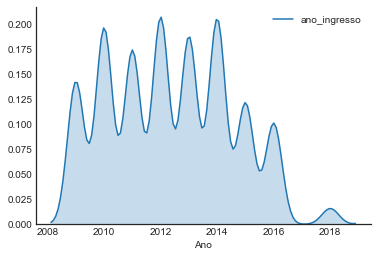

In [14]:
#Kernel density plot
sns.set_style("white")
sns.kdeplot(CanceladoTotal["ano_ingresso"], shade = True)
plt.xlabel("Ano")
sns.despine()
plt.show()

## Gráfico do Total de Cancelamentos ##

In [15]:
x = pd.pivot_table(CanceladoTotal,
               index='ano_ingresso',
               values='nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
x

,ano_ingresso,nome_curso
0,2009,3081
1,2010,4221
2,2011,3707
3,2012,4444
4,2013,4041
5,2014,4432
6,2015,2603
7,2016,2162
8,2018,342


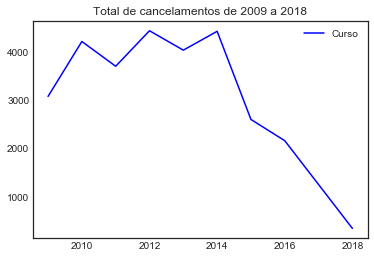

In [16]:
plt.plot(x['ano_ingresso'], 
         x['nome_curso'], c='blue', label='Curso')
plt.legend(loc='upper right')
plt.title('Total de cancelamentos de 2009 a 2018')
plt.show()

## Gráfico dos cancelamentos de TI ##

In [17]:
imd = CanceladoTotal[CanceladoTotal.nome_curso.str.contains("TECNOLOGIA DA INFORMAÇÃO")]
imd.head()

,matricula,nome_discente,ano_ingresso,periodo_ingresso,tipo_discente,status,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade
15540,2.013047e+09,ALESON BELO DA SILVA,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
15565,2.013042e+09,ALEXANDRE TADEU DE FIGUEIREDO AZEVEDO,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
15621,2.013021e+09,ALTEMAR ARIOSTENE SOLON,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
15624,2.013050e+09,ALVARO EDUARDO SILVA SOARES,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
15628,2.013020e+09,ALYSON DAVID DE CARVALHO LIMA,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL


In [18]:
y = pd.pivot_table(imd,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
y

,ano_ingresso,nome_curso
0,2013,153
1,2014,163
2,2015,134
3,2016,111
4,2018,10


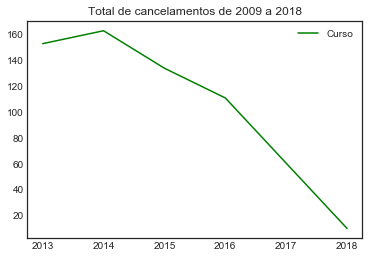

In [19]:
plt.plot(y['ano_ingresso'], 
         y['nome_curso'], c='green', label='Curso')
plt.legend(loc='upper right')
plt.title('Total de cancelamentos de 2009 a 2018')
plt.show()